<a href="https://colab.research.google.com/github/ashish311002/WiDs-IPL-DATA-ANALYSIS-/blob/main/ML_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns




# READING DATA


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
ball=pd.read_csv('/content/drive/MyDrive/IPLDATAANALYSIS/IPL Ball-by-Ball 2008-2020.csv')
ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
matches=pd.read_csv('/content/drive/MyDrive/IPLDATAANALYSIS/IPL Matches 2008-2020.csv')

In [5]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# MERGING THE TWO DATAFRAMES

In [6]:
df=pd.merge(ball,matches,on='id',how='right')
df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen


# PREPROCESSING DATA


In [7]:
df['date']=pd.to_datetime(df['date'])
#converting the date column into a date time object so that we can sort it easily based on the date

In [8]:
df=df.sort_values(by=['date','inning','over','ball'])

df.head(6)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
79,335982,1,0,1,SC Ganguly,BB McCullum,P Kumar,0,1,1,0,0,NaN,NaN,NaN,legbyes,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
80,335982,1,0,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
81,335982,1,0,3,BB McCullum,SC Ganguly,P Kumar,0,1,1,0,0,NaN,NaN,NaN,wides,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
82,335982,1,0,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
83,335982,1,0,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
84,335982,1,0,6,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen


In [9]:
df.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
city                  3139
date                     0
player_of_match        372
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                 372
result_margin         3597
eliminator             372
method              190260
umpire1                  0
umpire2                  0
dtype: int64

In [10]:
df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [11]:
#replacing the wrong names of the team
df=df.replace(['Pune Warriors','Rising Pune Supergiant','Delhi Daredevils'],['Rising Pune Supergiants','Rising Pune Supergiants','Delhi Capitals'])
df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
79,335982,1,0,1,SC Ganguly,BB McCullum,P Kumar,0,1,1,0,0,NaN,NaN,NaN,legbyes,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
80,335982,1,0,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
81,335982,1,0,3,BB McCullum,SC Ganguly,P Kumar,0,1,1,0,0,NaN,NaN,NaN,wides,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
82,335982,1,0,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
83,335982,1,0,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,2,17,6,HH Pandya,Ishan Kishan,K Rabada,1,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193373,1237181,2,18,1,HH Pandya,Ishan Kishan,A Nortje,1,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193374,1237181,2,18,2,Ishan Kishan,HH Pandya,A Nortje,1,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193375,1237181,2,18,3,HH Pandya,Ishan Kishan,A Nortje,0,0,0,0,1,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [12]:
df['year']=pd.DatetimeIndex(df['date']).year
df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
79,335982,1,0,1,SC Ganguly,BB McCullum,P Kumar,0,1,1,0,0,NaN,NaN,NaN,legbyes,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
80,335982,1,0,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
81,335982,1,0,3,BB McCullum,SC Ganguly,P Kumar,0,1,1,0,0,NaN,NaN,NaN,wides,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
82,335982,1,0,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
83,335982,1,0,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008


In [13]:
columns = ['neutral_venue', 'result', 'result_margin', 'umpire1', 'umpire2', 'batsman', 'non_striker', 'bowler', 'non_boundary', 'dismissal_kind',
           'player_dismissed', 'fielder', 'extras_type', 'player_of_match', 'venue', 'city']
df1 = df.drop(columns = columns)
df1.head()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,date,team1,team2,toss_winner,toss_decision,winner,eliminator,method,year
79,335982,1,0,1,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,NaN,2008
80,335982,1,0,2,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,NaN,2008
81,335982,1,0,3,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,NaN,2008
82,335982,1,0,4,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,NaN,2008
83,335982,1,0,5,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,NaN,2008


In [14]:
df['method'].unique()

array([nan, 'D/L'], dtype=object)

In [15]:
df1.isnull().sum()

id                    0
inning                0
over                  0
ball                  0
batsman_runs          0
extra_runs            0
total_runs            0
is_wicket             0
batting_team          0
bowling_team        191
date                  0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner              372
eliminator          372
method           190260
year                  0
dtype: int64

In [16]:
df1['method']=df1['method'].fillna('Normal')
df1.head()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,date,team1,team2,toss_winner,toss_decision,winner,eliminator,method,year
79,335982,1,0,1,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,2008
80,335982,1,0,2,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,2008
81,335982,1,0,3,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,2008
82,335982,1,0,4,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,2008
83,335982,1,0,5,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,2008


In [17]:
df1.isnull().sum()

id                 0
inning             0
over               0
ball               0
batsman_runs       0
extra_runs         0
total_runs         0
is_wicket          0
batting_team       0
bowling_team     191
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner           372
eliminator       372
method             0
year               0
dtype: int64

In [18]:
df1=df1.dropna()
df1.isnull().sum()

id               0
inning           0
over             0
ball             0
batsman_runs     0
extra_runs       0
total_runs       0
is_wicket        0
batting_team     0
bowling_team     0
date             0
team1            0
team2            0
toss_winner      0
toss_decision    0
winner           0
eliminator       0
method           0
year             0
dtype: int64

In [19]:
df1.head()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,date,team1,team2,toss_winner,toss_decision,winner,eliminator,method,year
79,335982,1,0,1,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,2008
80,335982,1,0,2,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,2008
81,335982,1,0,3,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,2008
82,335982,1,0,4,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,2008
83,335982,1,0,5,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,2008


In [20]:
df1.reset_index(inplace=True)
df1.drop(columns=['index'],inplace=True)
df1.head()
df1['eliminator'].unique()

array(['N', 'Y'], dtype=object)

# ONE HOT ENCODING

In [21]:
dummy_toss=pd.get_dummies(df1['toss_decision'])
df_enc=pd.concat([df1,dummy_toss],axis='columns')
df_enc.drop(columns=['toss_decision','bat','year'],inplace=True) #the bat column does not provide any new information therefore dropped
#df_enc
dummy_method=pd.get_dummies(df1['method'])
df_enc=pd.concat([df_enc,dummy_method],axis=1)
df_enc.drop(columns=['method','Normal'],inplace=True)  #The normal column does not add any new value so dropping it along with the original column
#df_enc.head()
dummy_eliminator=pd.get_dummies(df1['eliminator'])
df_enc=pd.concat([df_enc,dummy_eliminator],axis=1)
df_enc.drop(columns=['eliminator','N'],inplace=True)
df_enc.rename(columns={'Y':'eliminator?'},inplace=True)
df_enc.head()


,id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,date,team1,team2,toss_winner,winner,field,D/L,eliminator?
0,335982,1,0,1,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0
1,335982,1,0,2,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0
2,335982,1,0,3,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0
3,335982,1,0,4,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0
4,335982,1,0,5,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0


CREATING A NEW COLUMN WITH THE VALUE AS ID+BATTING TEAM WHICH WILL ACT AS THE ID FOR AN INNING

In [22]:
df_enc['id_inning']=df_enc['id'].astype(str)+df_enc['batting_team']
df_enc.head()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,date,team1,team2,toss_winner,winner,field,D/L,eliminator?,id_inning
0,335982,1,0,1,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0,335982Kolkata Knight Riders
1,335982,1,0,2,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0,335982Kolkata Knight Riders
2,335982,1,0,3,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0,335982Kolkata Knight Riders
3,335982,1,0,4,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0,335982Kolkata Knight Riders
4,335982,1,0,5,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0,335982Kolkata Knight Riders


In [23]:
list=df_enc['id_inning'].unique()
len(list)


1624

In [24]:
df_copy=df_enc.groupby(by=['id_inning']).sum()['total_runs'].reset_index()
df_copy.head()

,id_inning,total_runs
0,1082591Royal Challengers Bangalore,172
1,1082591Sunrisers Hyderabad,207
2,1082592Mumbai Indians,184
3,1082592Rising Pune Supergiants,187
4,1082593Gujarat Lions,183


In [25]:
data=pd.merge(left=df_enc,right=df_copy,on='id_inning',how='right')
data.head(6)

,id,inning,over,ball,batsman_runs,extra_runs,total_runs_x,is_wicket,batting_team,bowling_team,date,team1,team2,toss_winner,winner,field,D/L,eliminator?,id_inning,total_runs_y
0,1082591,2,0,1,1,0,1,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
1,1082591,2,0,2,0,0,0,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
2,1082591,2,0,3,0,0,0,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
3,1082591,2,0,4,2,0,2,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
4,1082591,2,0,5,4,0,4,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
5,1082591,2,0,6,4,0,4,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172


In [26]:
data['over']=data['over']+(data['ball'])/10



data.drop(columns=['ball'],inplace=True)

data.head(12)


,id,inning,over,batsman_runs,extra_runs,total_runs_x,is_wicket,batting_team,bowling_team,date,team1,team2,toss_winner,winner,field,D/L,eliminator?,id_inning,total_runs_y
0,1082591,2,0.1,1,0,1,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
1,1082591,2,0.2,0,0,0,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
2,1082591,2,0.3,0,0,0,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
3,1082591,2,0.4,2,0,2,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
4,1082591,2,0.5,4,0,4,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
5,1082591,2,0.6,4,0,4,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
6,1082591,2,1.1,0,0,0,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
7,1082591,2,1.2,0,0,0,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
8,1082591,2,1.3,1,0,1,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
9,1082591,2,1.4,0,0,0,0,Royal Challengers Bangalore,Sunrisers Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172


# ADDING RUNS AND WICKETS AT EVERY INSTANT OF THE MATCH

In [27]:
data_final=pd.DataFrame()
for id in list:
  inning_data=data[data['id_inning']==id]
  cum_total=inning_data.loc[:,'total_runs_x'].cumsum(axis=0)
  cum_wicket=inning_data.loc[:,'is_wicket'].cumsum(axis=0)
  inning_data['runs']=cum_total
  inning_data['wickets']=cum_wicket
  data_final=data_final.append(inning_data,ignore_index=True)
data_final.head()


,id,inning,over,batsman_runs,extra_runs,total_runs_x,is_wicket,batting_team,bowling_team,date,team1,team2,toss_winner,winner,field,D/L,eliminator?,id_inning,total_runs_y,runs,wickets
0,335982,1,0.1,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0,335982Kolkata Knight Riders,222,1,0
1,335982,1,0.2,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0,335982Kolkata Knight Riders,222,1,0
2,335982,1,0.3,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0,335982Kolkata Knight Riders,222,2,0
3,335982,1,0.4,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0,335982Kolkata Knight Riders,222,2,0
4,335982,1,0.5,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,0,335982Kolkata Knight Riders,222,2,0


# LABEL ENCODING FOR TEAMS

In [28]:
from sklearn import preprocessing
p=preprocessing.LabelEncoder()

In [29]:
data_final['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants', 'Sunrisers Hyderabad', 'Gujarat Lions'],
      dtype=object)

In [30]:
team_dict = {'Mumbai Indians':12, 'Chennai Super Kings':11, 'Rajasthan Royals':10, 'Kolkata Knight Riders':9, 'Kings XI Punjab':8,
             'Sunrisers Hyderabad':7, 'Delhi Capitals':6, 'Royal Challengers Bangalore':5, 'Gujarat Lions':4, 'Deccan Chargers':3,
             'Rising Pune Supergiants':2, 'Kochi Tuskers Kerala':1
             }

In [31]:
temp=data_final.copy()
temp['team1']=temp.team1.map(team_dict)
temp['team2']=temp.team2.map(team_dict)
temp['winner']=temp.winner.map(team_dict)
temp['toss_winner']=temp.toss_winner.map(team_dict)
temp['batting_team']=temp.batting_team.map(team_dict)
temp['bowling_team']=temp.bowling_team.map(team_dict)
temp.head()
temp.isnull().sum()

id              0
inning          0
over            0
batsman_runs    0
extra_runs      0
total_runs_x    0
is_wicket       0
batting_team    0
bowling_team    0
date            0
team1           0
team2           0
toss_winner     0
winner          0
field           0
D/L             0
eliminator?     0
id_inning       0
total_runs_y    0
runs            0
wickets         0
dtype: int64

In [32]:
temp.drop(columns=['id_inning','extra_runs','total_runs_x','is_wicket','batsman_runs'],inplace=True)
temp.head()

,id,inning,over,batting_team,bowling_team,date,team1,team2,toss_winner,winner,field,D/L,eliminator?,total_runs_y,runs,wickets
0,335982,1,0.1,9,5,2008-04-18,5,9,5,9,1,0,0,222,1,0
1,335982,1,0.2,9,5,2008-04-18,5,9,5,9,1,0,0,222,1,0
2,335982,1,0.3,9,5,2008-04-18,5,9,5,9,1,0,0,222,2,0
3,335982,1,0.4,9,5,2008-04-18,5,9,5,9,1,0,0,222,2,0
4,335982,1,0.5,9,5,2008-04-18,5,9,5,9,1,0,0,222,2,0


In [33]:
X=temp.copy()
y_winner=X.iloc[:,-7].values
y_winner=y_winner.reshape(-1,1)
X.drop(columns=['winner','id','date'],inplace=True)
X.isnull().sum()


inning          0
over            0
batting_team    0
bowling_team    0
team1           0
team2           0
toss_winner     0
field           0
D/L             0
eliminator?     0
total_runs_y    0
runs            0
wickets         0
dtype: int64

In [34]:
X.head()

,inning,over,batting_team,bowling_team,team1,team2,toss_winner,field,D/L,eliminator?,total_runs_y,runs,wickets
0,1,0.1,9,5,5,9,5,1,0,0,222,1,0
1,1,0.2,9,5,5,9,5,1,0,0,222,1,0
2,1,0.3,9,5,5,9,5,1,0,0,222,2,0
3,1,0.4,9,5,5,9,5,1,0,0,222,2,0
4,1,0.5,9,5,5,9,5,1,0,0,222,2,0


In [35]:
y=X.iloc[:,-3].values#Extracting the total runs column from the dataframe most important feature for predicting the winner
y=y.reshape(-1,1)#Reshaping the numpy array 

#y=pd.DataFrame(data=y[0:,0],columns=['runs_total'])
X.drop(columns=['total_runs_y'],inplace=True)
X.head()

,inning,over,batting_team,bowling_team,team1,team2,toss_winner,field,D/L,eliminator?,runs,wickets
0,1,0.1,9,5,5,9,5,1,0,0,1,0
1,1,0.2,9,5,5,9,5,1,0,0,1,0
2,1,0.3,9,5,5,9,5,1,0,0,2,0
3,1,0.4,9,5,5,9,5,1,0,0,2,0
4,1,0.5,9,5,5,9,5,1,0,0,2,0


# CUSTOM ACCURACY FUNCTION


In [36]:
def custom_accu(y_test,y_pred,thresh):

  correct=0
  length=len(y_pred)
  for i in range(0,length):

    if(abs(y_test[i]-y_pred[i])<=thresh):

      correct=correct+1
  return((correct/length)*100)

# MODELS

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [38]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.5,random_state=1)

# LINEAR REGRESSION

In [39]:
lin_reg=make_pipeline(StandardScaler(),LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [40]:
y_pred=lin_reg.predict(X_test)
y_test.shape


(96548, 1)

In [41]:
y_pred.shape

(96548, 1)

In [42]:
print('Custom accuracy is: '+str(custom_accu(y_test,y_pred,12))+'%')


Custom accuracy is: 48.8699921282678%


# Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr=make_pipeline(StandardScaler(),RandomForestRegressor())
rfr.fit(X_train,y_train.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [44]:
y_predict=rfr.predict(X_test)
print('Custom accuracy is:'+str(custom_accu(y_test,y_predict,10))+'%')

Custom accuracy is:75.5323776774247%


In [45]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [46]:
#from sklearn.model_selection import GridSearchCV
#param_grid_rf2 = {
#               "n_estimators": [10,30,50],
#              "max_depth": [10,50,100],           
#             }         
#gr_rf2 = GridSearchCV(RandomForestRegressor(),param_grid_rf2,cv=5)
#gr_rf2.fit(X_train,y_train.ravel())

In [47]:
#gr_rf2.best_params_

In [48]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
svr = SVR()

In [49]:
rf = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators = 500,
                                                           max_depth = 100)
                  )
rf.fit(X_train, y_train.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, n_estimators=500))])

In [50]:
y_predict=rf.predict(X_test)
print('Custom accuracy is:'+str(custom_accu(y_test,y_predict,10))+'%')

Custom accuracy is:75.58105812652774%


[]

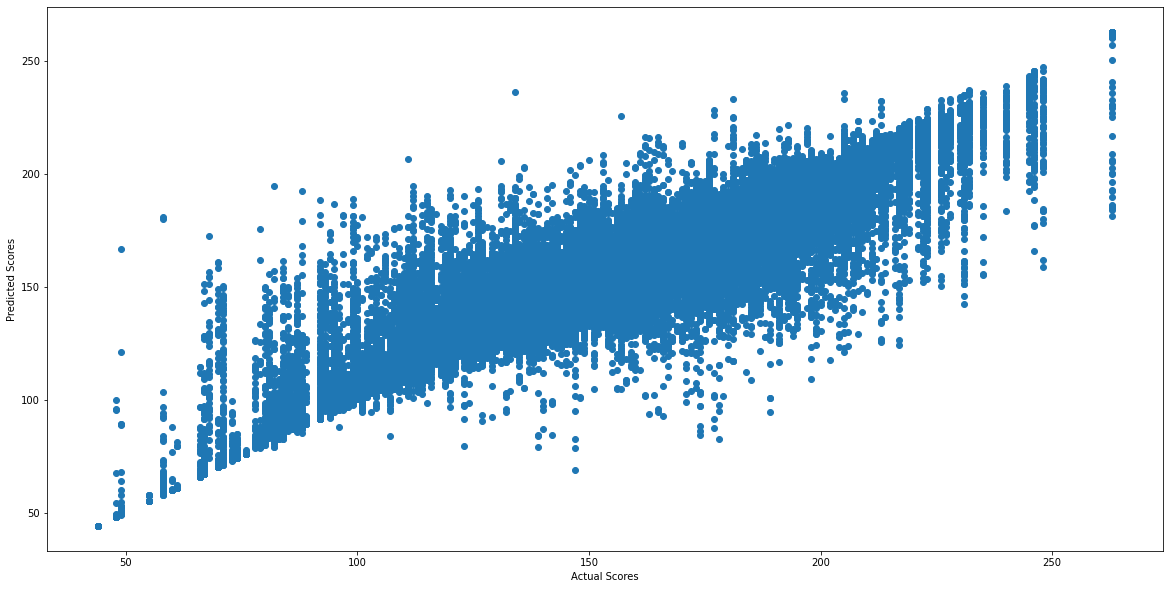

In [51]:
plt.figure(figsize=(20,10))
plt.scatter(y_test,y_predict)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.plot()

# WINNER PREDICTION TASK

# Classifier


RFC

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X,y_winner,test_size=0.5,random_state=1)

In [54]:

clf = RandomForestClassifier()
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9383726229440278


# SVC

In [55]:
from sklearn.svm import SVC

In [56]:
svc = SVC(C=0.05)
svc.fit(X_train, y_train.ravel())

SVC(C=0.05)

In [58]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.2458569830550607
